In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import itertools
import sklearn.feature_selection
import sklearn.model_selection as ms
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from scipy import stats
from sklearn.preprocessing import normalize
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
plt.style.use('ggplot')
pd.options.display.max_columns = None
pd.options.display.max_rows = 600
from scipy.stats import norm, skew

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA

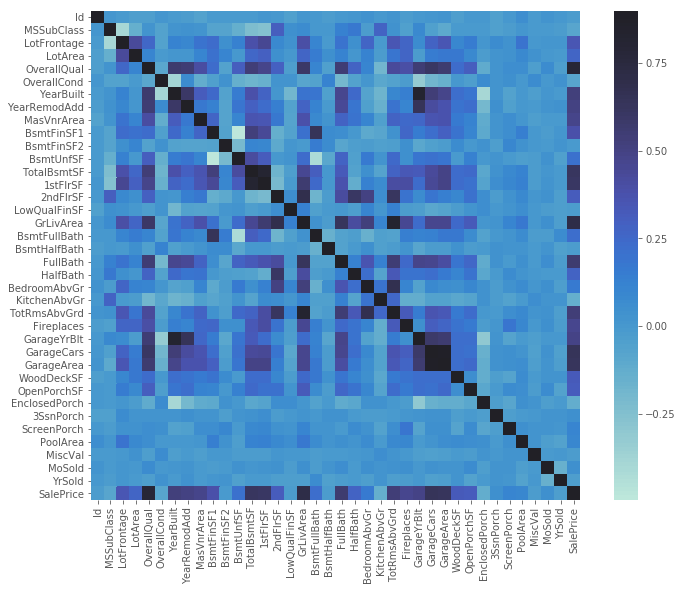

In [8]:
# SalePrice correlation heatmap

corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, center=1)

In [9]:
correlation = pd.DataFrame({"SalePrice Correlation": train.corr().loc['SalePrice'].abs().sort_values(ascending=False)})
correlation

,SalePrice Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


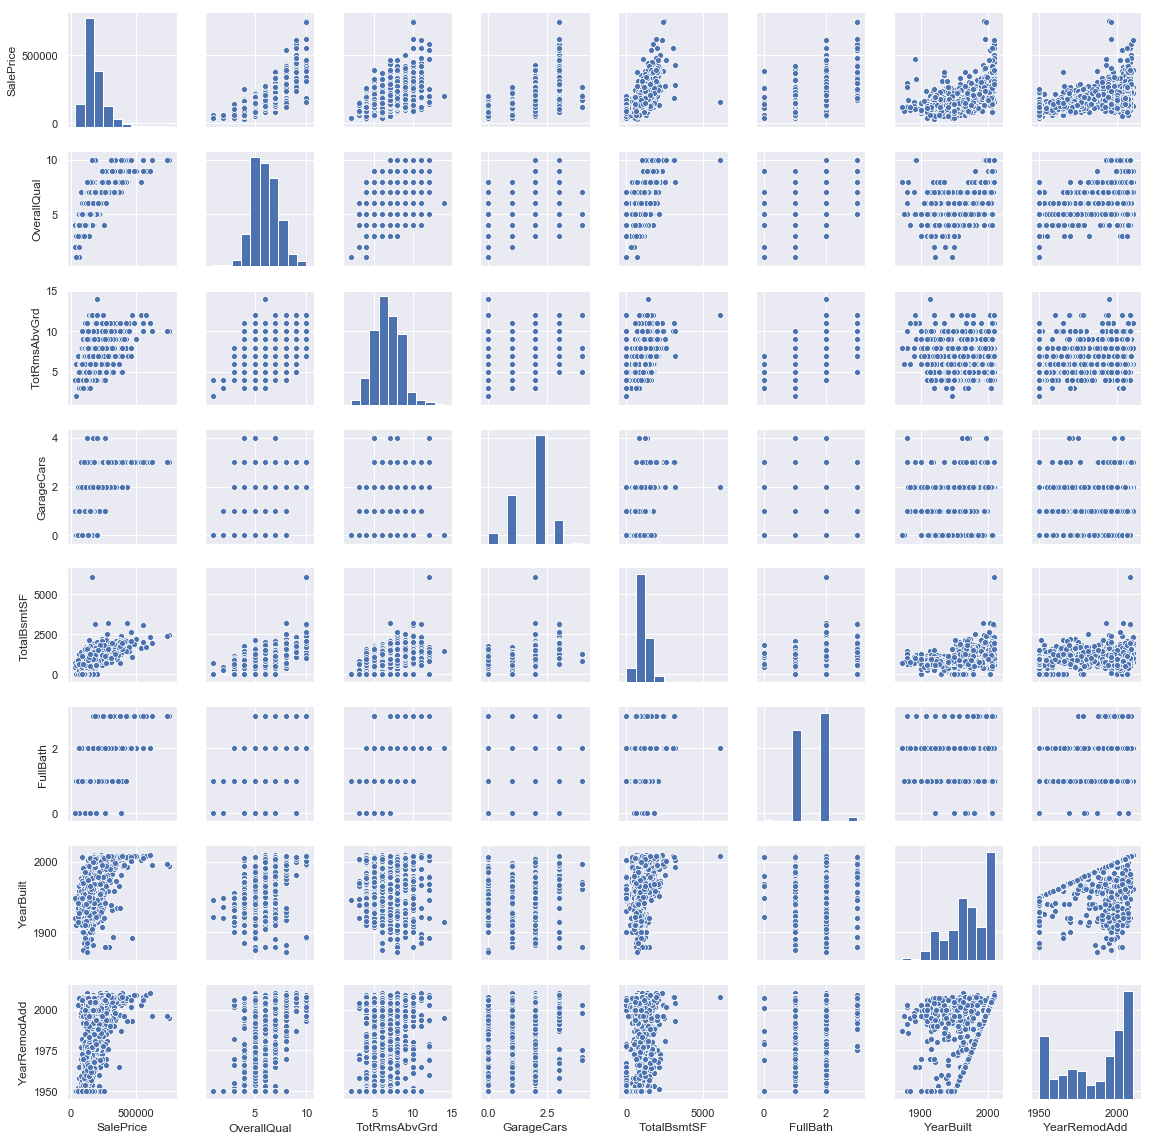

<Figure size 432x288 with 0 Axes>

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

sns.pairplot(train[cols], size = 2)
sns.set(font_scale=1.50)
plt.show()

plt.savefig('./High Correlations Pair Plot.png', height=200, bbox_inches='tight')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


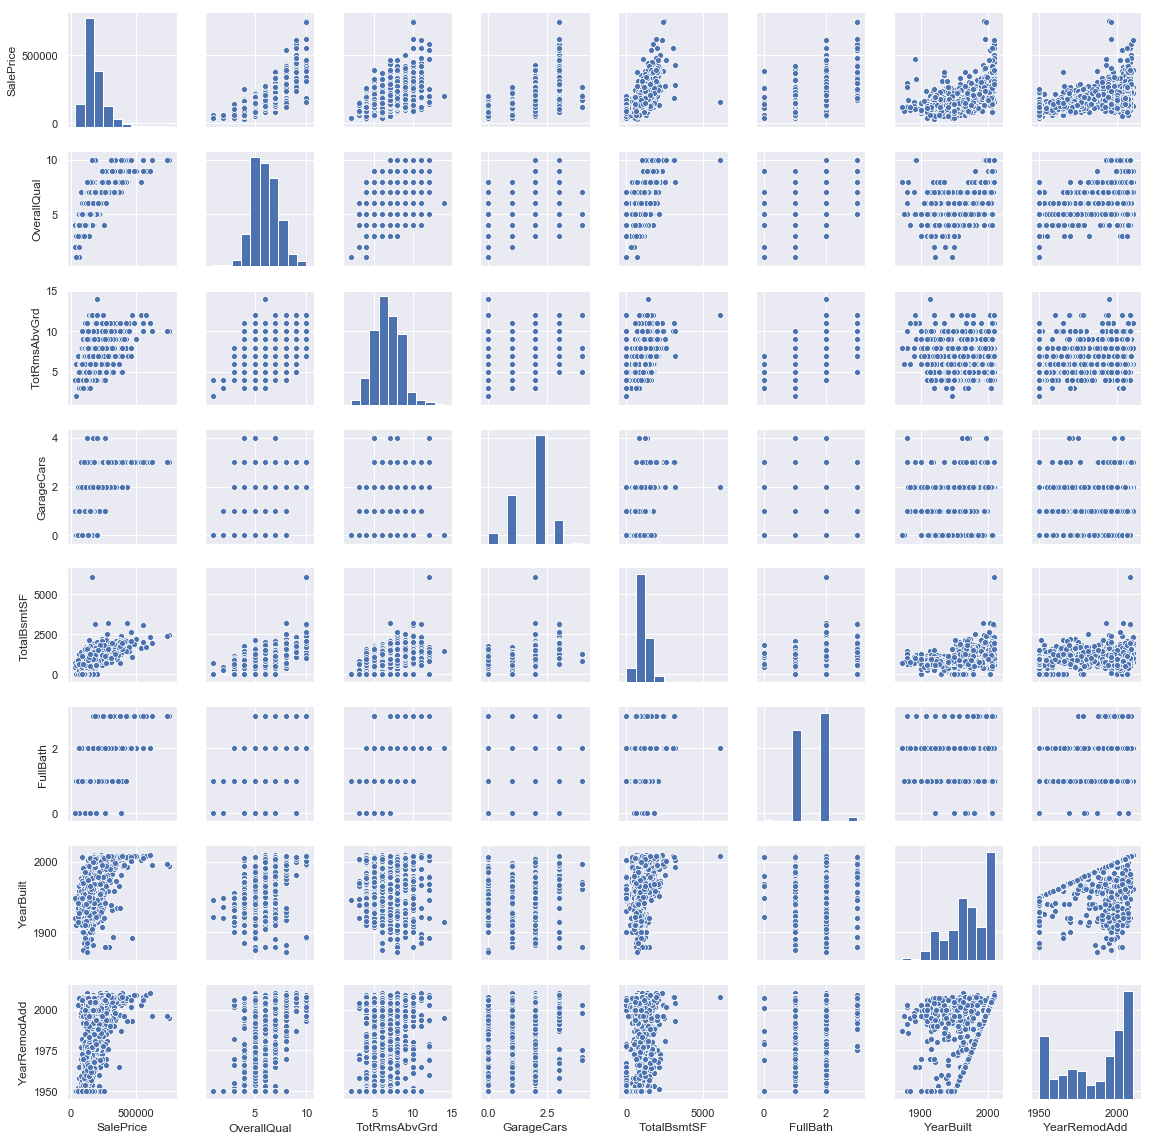

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

sns.pairplot(train[cols], size = 2)
sns.set(font_scale=1.50)
plt.show()

In [12]:
train['Total_SF'] = train["GrLivArea"] + train["TotalBsmtSF"]

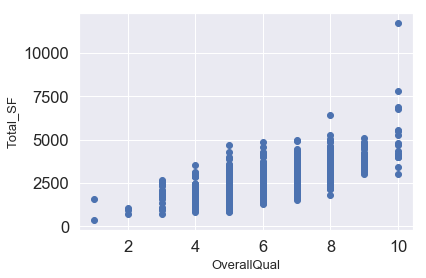

In [13]:
fig, ax = plt.subplots()
ax.scatter(y = train['Total_SF'], x = train['OverallQual'])
plt.ylabel('Total_SF', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

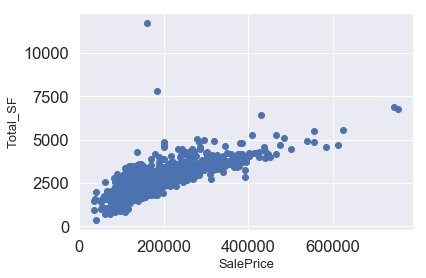

In [14]:
fig, ax = plt.subplots()
ax.scatter(y = train['Total_SF'], x = train['SalePrice'])
plt.ylabel('Total_SF', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)
plt.savefig('./Total SF.png',bpi=300, bbox_inches='tight')
plt.show()



In [15]:
  dataframe.drop(dataframe[(dataframe['OverallQual'] < 5) & (
        dataframe['SalePrice'] > 200000)].index, inplace=True)

        dataframe.drop(dataframe[(dataframe['OverallQual'] < 9) & (
        dataframe['SalePrice'] > 500000)].index, inplace=True)

        dataframe.drop(dataframe[(dataframe['GrLivArea'] > 4000) & (
        dataframe['SalePrice'] < 300000) & (dataframe['SalePrice'] > 0)].index, inplace=True)

IndentationError: unexpected indent (<ipython-input-15-2a9b9714bae4>, line 4)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y = train['OverallQual'], x = train['SalePrice'])
plt.ylabel('OverallQual', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)
plt.savefig('./Overall Qual.png',bpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y = train['GrLivArea'], x = train['SalePrice'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)
plt.savefig('./GrLivArea.png',bpi=300, bbox_inches='tight')
plt.show()

In [ ]:
train[(train['OverallQual'] < 5) & (train['SalePrice'] > 200000)]

In [ ]:
train[(train['OverallQual'] < 9) & (train['SalePrice'] > 500000)]

In [ ]:
train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]

# Missing Values

In [ ]:
# Create dataframe with missing value totals and percents 
total_missing = train.isnull().sum().sort_values(ascending=False)

percent_missing = (train.isnull().sum()/1460).sort_values(ascending=False)

train_missing = pd.concat([total_missing,percent_missing], axis=1, keys = ['total_missing','percent_missing'])

train_missing = train_missing.head(20)

train_missing

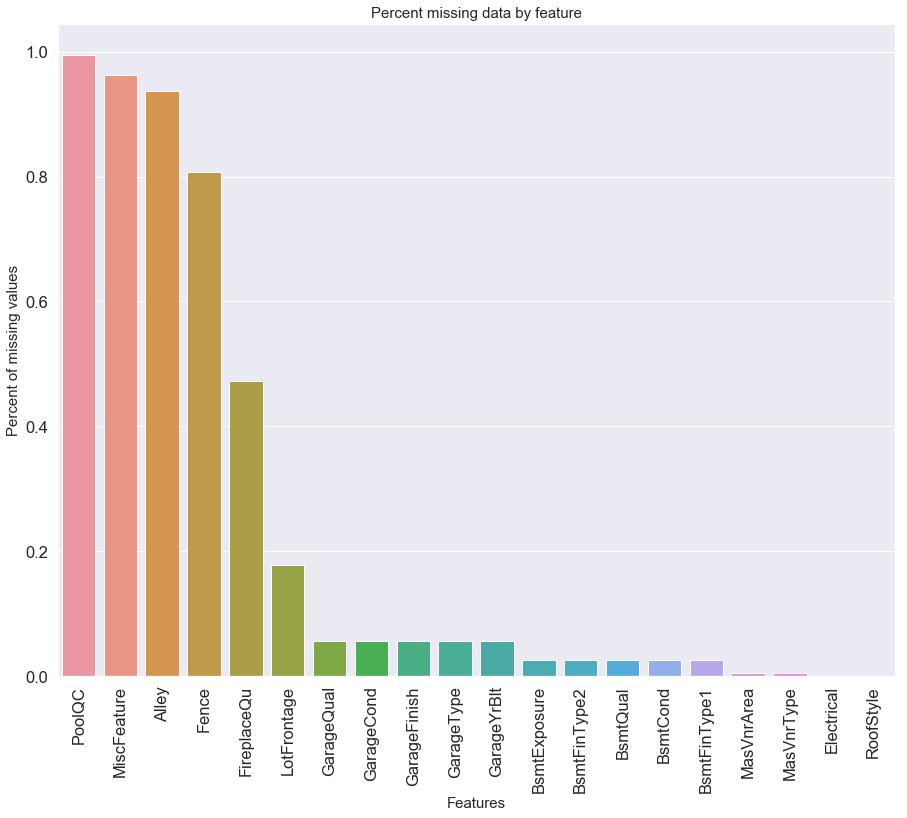

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_missing.index, y=train_missing['percent_missing'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.savefig('./Missing Values.png',bpi=300, bbox_inches='tight')
plt.show()

# Data Cleaning and Feature Engineering

In [20]:
# Adding 'type' columns that contains 'train' or 'test', and add empty SalePrice columns to the test part
train.insert(0, 'type', 'train')
test.insert(0,'type','test')
test['SalePrice'] = 0.0

# merging the two dataframes
merged = pd.concat([train,test],axis=0).reset_index(drop=True)
merged['SalePrice'] = merged['SalePrice'].astype('float')

# Data cleaning
import Dprocessv5
train = Dprocessv5.dataProcess(merged);

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [21]:
# numerical and categorical features + excluded features
excl_features = merged[['Id','type','SalePrice']].columns
cat_features = merged.select_dtypes(include = ["object"]).columns.drop('type')
num_features = merged.select_dtypes(exclude = ["object"]).columns.drop(['Id','SalePrice'])

mergedNum = merged[num_features]
mergedCat = merged[cat_features]
mergedExc = merged[excl_features]

mergedNAtotal = merged.isnull().sum().sort_values(ascending=False)

print("NAs for numerical features in merged : " + str(mergedNum.isnull().values.sum()))

if mergedNum.isnull().values.sum() != 0:
    mergedNum = mergedNum.fillna(mergedNum.median())
    print("Remaining NAs for numerical features in merged : " + str(mergedNum.isnull().values.sum()))

NAs for numerical features in merged : 1459
Remaining NAs for numerical features in merged : 0


# Dummify

In [22]:
# Create dummy features for categorical values

print("Remaining NAs for categorical features in merged : " + str(mergedCat.isnull().values.sum()))

print("NAs for categorical features in merged : " + str(mergedCat.isnull().values.sum()))

mergedCat = pd.get_dummies(mergedCat)

Remaining NAs for categorical features in merged : 0
NAs for categorical features in merged : 0


In [23]:
# rejoin excluded, categorical and numerical features
merged = pd.concat([mergedExc,mergedNum, mergedCat], axis = 1)

print("New number of features : " + str(merged.shape[1]))

New number of features : 336


In [24]:
merged.shape

(2915, 336)

In [25]:
train = merged[merged['type'] == 'train']
train.drop(columns=['Id','type'],inplace=True)
test = merged[merged['type'] == 'test']
test.drop(columns=['type','SalePrice'],inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Skew / Boxcox

In [26]:
# Create DF of skewed features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in merged.columns:
    if merged[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = merged[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})

In [27]:
# BOXCOX

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    if i != 'SalePrice':
        merged[i]= boxcox1p(merged[i], boxcox_normmax(merged[i]+1))

        
skew_features2 = merged[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})

# Sale Price Log to fix Skewness

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



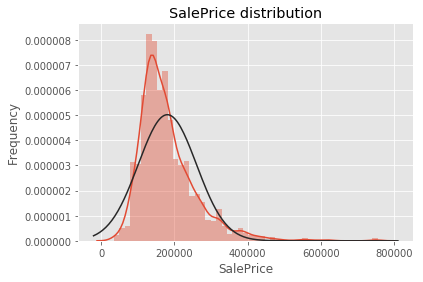

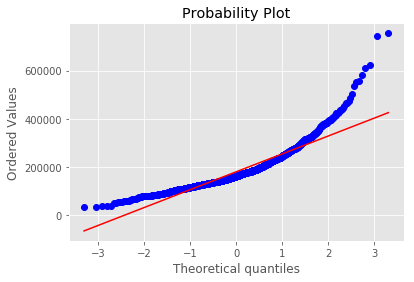

In [3]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution

plt.ylabel('Frequency')
plt.savefig("SalePrice Skewed.png",bpi=300, bbox_inches='tight')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig("./SalePrice Skewed QQ.png",bpi=300, bbox_inches='tight')
plt.show()

# SKEWED RIGHT!

In [29]:
# taking the log of the saleprice

train['SalePrice'] = np.log(train['SalePrice'])
train['SalePrice'].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    1456.000000
mean       12.022909
std         0.398649
min        10.460242
25%        11.774520
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



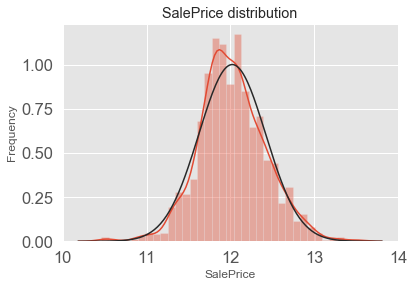

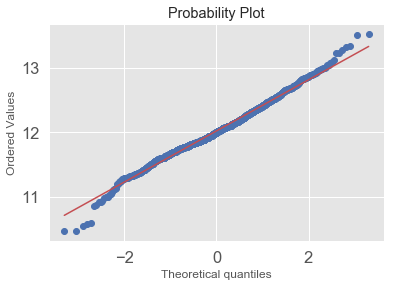

In [30]:
# Double check that skewness has been fixed

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution

plt.ylabel('Frequency')
plt.savefig("SalePrice Fix Skewed.png",bpi=300, bbox_inches='tight')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig("SalePrice Fix Skewed QQ.png",bpi=300, bbox_inches='tight')
plt.show()

In [31]:
train.corr().loc['SalePrice'].abs().sort_values(ascending=False)

SalePrice                1.000000
OverallQual              0.823694
Total_SF                 0.819619
GrLivArea                0.723434
GarageCars               0.680416
GarageArea               0.655321
TotalBsmtSF              0.646862
1stFlrSF                 0.619524
ExterQual_TA             0.596889
FullBath                 0.594996
YearBuilt                0.587603
GarageYrBlt              0.569984
YearRemodAdd             0.565978
KitchenQual_TA           0.537924
TotRmsAbvGrd             0.535024
Foundation_PConc         0.531747
ExterQual_Gd             0.513790
FireplaceQu_0            0.509667
Fireplaces               0.491679
BsmtQual_TA              0.477189
BsmtQual_Ex              0.469634
HeatingQC_Ex             0.466084
BsmtFinType1_GLQ         0.444714
GarageFinish_Unf         0.431483
MasVnrArea               0.427990
GarageType_Attchd        0.419932
GarageFinish_Fin         0.417019
KitchenQual_Ex           0.413533
KitchenQual_Gd           0.409310
MSSubClass_60 